In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data

In [3]:
from analysis_utils import load_json_restore_arrays
data = load_json_restore_arrays('../data/data_electrophysiology.json')

# Data overview

Overview of data

In [4]:
def print_counts(data, category, label):
    grouped_data = data.groupby([category, label]).size().reset_index(name='counts')
    for cat_value in grouped_data[category].unique():
        for label_value in grouped_data[label].unique():
            count = grouped_data[(grouped_data[category] == cat_value) & (grouped_data[label] == label_value)].counts.values[0]
            print(f"{cat_value} {label_value} n={count}")
    print('----------------')

print_counts(data, 'Core', 'TH_label')
print_counts(data, 'Mediolateral_Level', 'TH_label')
print_counts(data, 'Neurochem_Confidence', 'TH_label')

data_ml = data.groupby('Mediolateral_Level').size().reset_index(name='counts')
for ml in data_ml.Mediolateral_Level.unique():
    total_count = data_ml[data_ml['Mediolateral_Level'] == ml].counts.sum()
    print(f"{ml} n={total_count}")


inside neg n=13
inside pos n=17
outside neg n=7
outside pos n=13
----------------
<undefined> neg n=1
<undefined> pos n=3
intermediate neg n=13
intermediate pos n=19
lateral neg n=2
lateral pos n=1
medial neg n=4
medial pos n=7
----------------
high neg n=12
high pos n=27
low neg n=8
low pos n=3
----------------
<undefined> n=4
intermediate n=32
lateral n=3
medial n=11


# Plotting

In [5]:
# Color params
color_dict = dict(pos='#7570b3',
                   neg='#1b9e77')

## Plot: number of cells per Mediolateral level

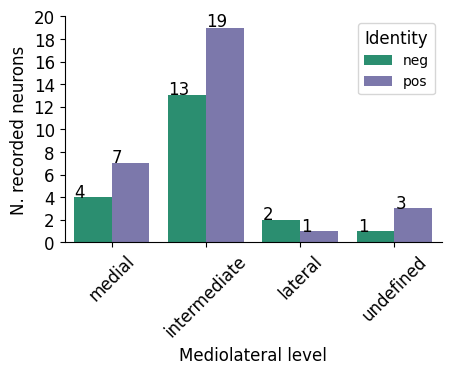

In [6]:
dat = data.groupby(['Mediolateral_Level', 'TH_label']).size().reset_index(name='counts')
dat['counts'] = dat['counts'].astype(int)
dat['Mediolateral_Level'] = dat['Mediolateral_Level'].replace('<undefined>', 'undefined')

fig, ax = plt.subplots(figsize=(6/1.3, 5/1.3))
sns.barplot(x='Mediolateral_Level', y='counts', hue='TH_label', order=['medial', 'intermediate', 'lateral', 'undefined'], data=dat, palette=color_dict, ax=ax)

ax.set_ylabel('N. recorded neurons', fontsize=12)
ax.set_xlabel('Mediolateral level', fontsize=12)
ax.set_yticks([5, 10, 15, 20])
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=12)

ax.get_legend().set_title('Identity', prop={'size': 12})


sns.despine()

#plt.savefig('..\\plots\\parcellation_count.png', dpi=300, bbox_inches='tight')
#plt.savefig('..\\plots\\parcellation_count.svg', dpi=300, bbox_inches='tight')

plt.show()

## Plot: electrophysiological properties accross mediolateral levels

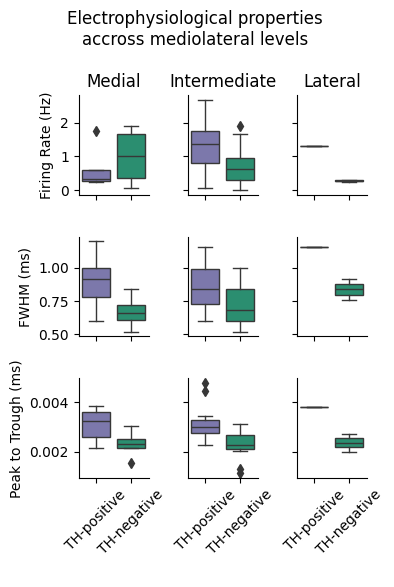

In [7]:
data_melted = pd.melt(data, id_vars=['TH_label', 'Mediolateral_Level'], value_vars=['firing_rate', 'waveshape_FWHM', 'waveshape_peakToTrough'], var_name='Metric', value_name='Value')

g = sns.FacetGrid(data_melted, 
                  col='Mediolateral_Level', 
                  row='Metric', 
                  col_order=['medial', 'intermediate', 'lateral'], 
                  sharey='row', 
                  aspect=2/3,   # width:height ratio
                  height=2)     # height in inches

g.map(sns.boxplot,
      'TH_label', 'Value',
        palette=color_dict, 
        order=['pos', 'neg'], 
        showfliers=True,
        linewidth=1)

g.axes[0,0].set_ylabel('Firing Rate (Hz)')
g.axes[1,0].set_ylabel('FWHM (ms)')
g.axes[2,0].set_ylabel('Peak to Trough (ms)')

g.axes[2,0].set_xticklabels(['TH-positive', 'TH-negative'])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.axes[2,0].set_xlabel(' ')
g.axes[2,1].set_xlabel(' ')
g.axes[2,2].set_xlabel(' ')

g.axes[0,0].set_title('Medial')
g.axes[0,1].set_title('Intermediate')
g.axes[0,2].set_title('Lateral')

[g.axes[i, j].set_title(' ') for i in [1, 2] for j in range(3)]

plt.subplots_adjust(top=0.9)
g.figure.suptitle('Electrophysiological properties\naccross mediolateral levels', fontsize=12)
plt.tight_layout(rect=[0, 0.01, 1, 0.99])

# Save plot
#plt.savefig('..\plots\parcellation_ML.png', dpi=300, bbox_inches='tight')
#plt.savefig('..\plots\parcellation_ML.svg', dpi=300, bbox_inches='tight')
plt.show()


## Plot: Electrophysiological properties of cells inside and outside LC borders

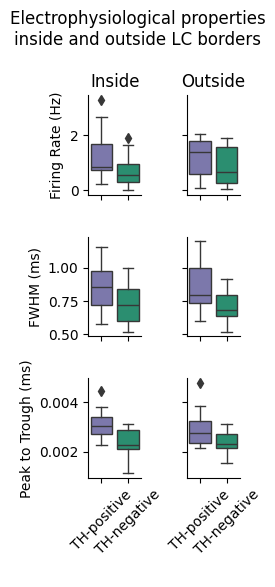

In [8]:
# Melt the data to long format
data_melted = pd.melt(data, id_vars=['TH_label', 'Core'], 
                     value_vars=['firing_rate', 'waveshape_FWHM', 'waveshape_peakToTrough'], 
                     var_name='Metric', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(data_melted, 
                  col='Core', 
                  row='Metric', 
                  col_order=['inside', 'outside'], 
                  sharey='row', 
                  aspect=2/3,   # width:height ratio
                  height=2)     # height in inches

g.map(sns.boxplot,
      'TH_label', 'Value',
        palette=color_dict, 
        order=['pos', 'neg'], 
        showfliers=True,
        linewidth=1)

g.axes[0,0].set_ylabel('Firing Rate (Hz)')
g.axes[1,0].set_ylabel('FWHM (ms)')
g.axes[2,0].set_ylabel('Peak to Trough (ms)')

g.axes[2,0].set_xticklabels(['TH-positive', 'TH-negative'])
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.axes[2,0].set_xlabel(' ')
g.axes[2,1].set_xlabel(' ')

g.axes[0,0].set_title('Inside')
g.axes[0,1].set_title('Outside')

[g.axes[i, j].set_title(' ') for i in [1, 2] for j in range(2)]  

plt.subplots_adjust(top=0.9)
g.figure.suptitle('Electrophysiological properties\ninside and outside LC borders', fontsize=12)

plt.tight_layout(rect=[0, 0.01, 1, 0.99])

# Save plot
#plt.savefig('..\plots\parcellation_core.png', dpi=300, bbox_inches='tight')
#plt.savefig('..\plots\parcellation_core.svg', dpi=300, bbox_inches='tight')

plt.show()


## Plot: Electrophysiological properties split by confidence of neurochemical assesment

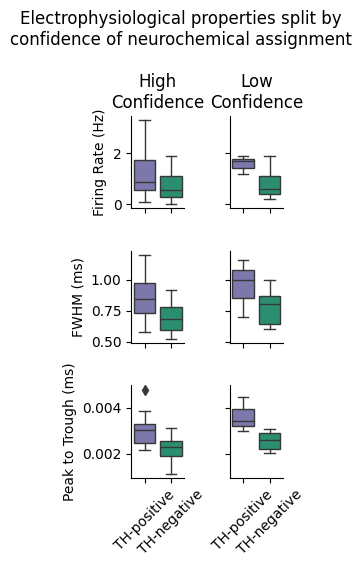

In [9]:
# Melt the data to long format
data_melted = pd.melt(data, id_vars=['TH_label', 'Neurochem_Confidence'], 
                     value_vars=['firing_rate', 'waveshape_FWHM', 'waveshape_peakToTrough'], 
                     var_name='Metric', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(data_melted, col='Neurochem_Confidence', row='Metric', 
                  col_order=['high', 'low'], sharey='row', aspect=2/3, height=2)

g.map(sns.boxplot, 'TH_label', 'Value',
      palette=color_dict, order=['pos', 'neg'], showfliers=True, linewidth=1)

# Setting y-axis labels
g.axes[0,0].set_ylabel('Firing Rate (Hz)')
g.axes[1,0].set_ylabel('FWHM (ms)')
g.axes[2,0].set_ylabel('Peak to Trough (ms)')

# Setting x-axis labels for the bottom-most plots
g.axes[2,0].set_xticklabels(['TH-positive', 'TH-negative'])
g.axes[2,1].set_xticklabels(['TH-positive', 'TH-negative'])
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.axes[2,0].set_xlabel(' ')
g.axes[2,1].set_xlabel(' ')

g.axes[0,0].set_title('High\nConfidence')
g.axes[0,1].set_title('Low\nConfidence')

[g.axes[i, j].set_title(' ') for i in [1, 2] for j in range(2)]

plt.subplots_adjust(top=0.9)
g.figure.suptitle('Electrophysiological properties split by\nconfidence of neurochemical assignment', fontsize=12)

plt.tight_layout(rect=[0, 0.01, 1, 0.99])

# Saving the combined plot in different formats
#plt.savefig('..\plots\parcellation_confidence.png', dpi=300, bbox_inches='tight')
#plt.savefig('..\plots\parcellation_confidence.svg', dpi=300, bbox_inches='tight')

plt.show()
